# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'

    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for your own interest.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [3]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)
print(f"The shapes before feature extractions is: train={X_train.shape}")
print(f"The shapes after feature extractions is: train={X_train_feats.shape}")

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])
print(f"The shapes after preprocessing is: train={X_train_feats.shape}")

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

/Users/jvenepally/Documents/Projects/cs231n/assignment1/cs231n/classifiers/linear_svm.py:92: RuntimeWarning: overflow encountered in double_scalars
  loss += reg * np.sum(W * W) # reg. loss
/Users/jvenepally/miniconda3/envs/cs231n/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/jvenepally/Documents/Projects/cs231n/assignment1/cs231n/classifiers/linear_svm.py:92: RuntimeWarning: overflow encountered in multiply
  loss += reg * np.sum(W * W) # reg. loss


lr 7.000000e-08 reg 5.000000e+04 train accuracy: 0.087163 val accuracy: 0.071000 loss: 13.791
lr 7.000000e-08 reg 1.000000e+05 train accuracy: 0.103531 val accuracy: 0.108000 loss: 9.563
lr 7.000000e-08 reg 5.000000e+05 train accuracy: 0.408245 val accuracy: 0.390000 loss: 9.000
lr 7.000000e-08 reg 1.000000e+06 train accuracy: 0.409041 val accuracy: 0.412000 loss: 9.000
lr 7.000000e-08 reg 5.000000e+06 train accuracy: 0.370735 val accuracy: 0.371000 loss: 9.000
lr 1.000000e-07 reg 5.000000e+04 train accuracy: 0.114122 val accuracy: 0.111000 loss: 10.416
lr 1.000000e-07 reg 1.000000e+05 train accuracy: 0.160714 val accuracy: 0.149000 loss: 9.047
lr 1.000000e-07 reg 5.000000e+05 train accuracy: 0.413143 val accuracy: 0.413000 loss: 9.000
lr 1.000000e-07 reg 1.000000e+06 train accuracy: 0.407286 val accuracy: 0.392000 loss: 9.000
lr 1.000000e-07 reg 5.000000e+06 train accuracy: 0.323653 val accuracy: 0.304000 loss: 9.000
lr 5.000000e-07 reg 5.000000e+04 train accuracy: 0.408490 val accura

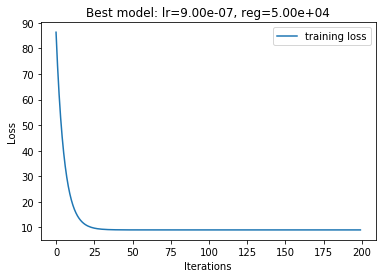

In [4]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [7e-8, 1e-7, 5e-7, 9e-7]
regularization_strengths = [5e4, 1e5, 5e5, 1e6, 5e6]

results = {}
best_val = -1
best_svm = None

################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

for lr in learning_rates:
    for reg in regularization_strengths:
        svm = LinearSVM()
        losses = svm.train(X_train_feats, y_train, learning_rate=lr, reg=reg, 
                           num_iters=200, batch_size=300, verbose=False)
        train_accu = np.mean(svm.predict(X_train_feats) == y_train)
        valid_accu = np.mean(svm.predict(X_val_feats) == y_val)
        results[(lr, reg)] = (train_accu, valid_accu, losses[-1])
        if valid_accu > best_val:
            best_val, best_svm = valid_accu, svm
            best_loss = losses
            best_lr, best_reg = lr, reg
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy, loss = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f loss: %.3f' % (
                lr, reg, train_accuracy, val_accuracy, loss))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)
plt.plot(best_loss, label='training loss')
plt.title('Best model: lr={:.2e}, reg={:.2e}'.format(best_lr, best_reg))
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [5]:
# Evaluate your trained SVM on the test set: you should be able to get at least 0.40
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.419


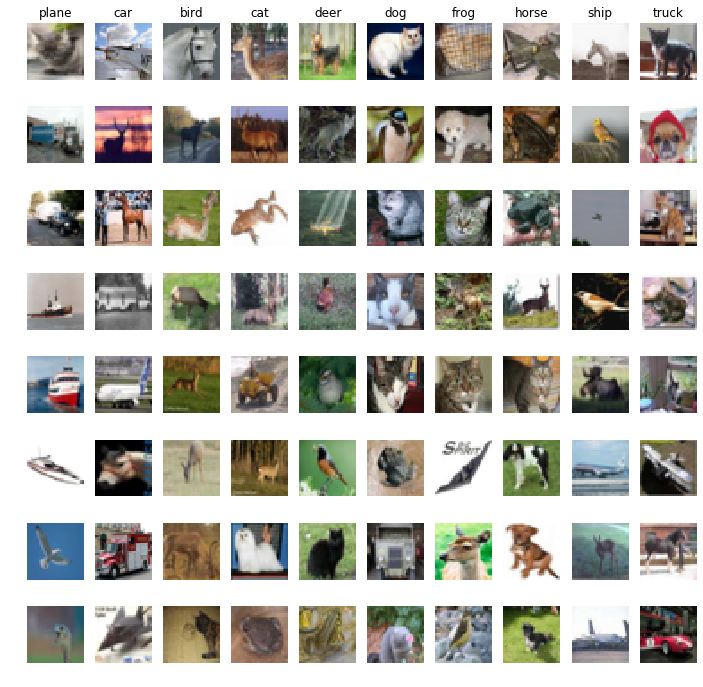

In [6]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

plt.figure(figsize=(12, 12))
examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?


$\color{blue}{\textit Your Answer:}$
1. When there is a blue or white background, an image is predicted as a plane.
2. In some cases, trucks are predicted as cars and cars as trucks.
3. like #1
4. (5, 7, 8) above, what's predicted as cat, deer, frog & horse doesn't make sense at all!!
6. Furry animals (cats, mostly) seem to have been predicted as dogs. 


## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [7]:
# Preprocessing: Remove the bias dimension
# Make sure to run this cell only ONCE
print(X_train_feats.shape)
X_train_feats = X_train_feats[:, :-1]
X_val_feats = X_val_feats[:, :-1]
X_test_feats = X_test_feats[:, :-1]

print(X_train_feats.shape)

(49000, 155)
(49000, 154)


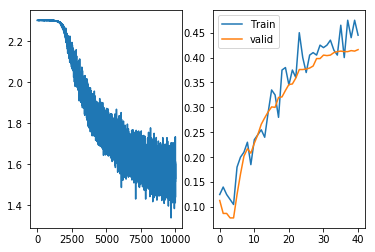

In [8]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
          learning_rate=1e-2, reg=0, learning_rate_decay=0.95,
          batch_size=200, num_iters=10000, verbose=False)

plt.subplot(1, 2, 1)
plt.plot(stats['loss_history'])
plt.subplot(1, 2, 2)
plt.plot(stats['train_acc_history'], label='Train')
plt.plot(stats['val_acc_history'], label='valid')
plt.legend()
plt.show()
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


time=20.327 lr=1.000e-02 reg=1.000e-05 #hidden:250 loss=1.548 train accu:=0.460             val accu=0.429
time=23.466 lr=1.000e-02 reg=1.000e-05 #hidden:300 loss=1.603 train accu:=0.480             val accu=0.430
time=32.714 lr=1.000e-02 reg=1.000e-05 #hidden:400 loss=1.562 train accu:=0.435             val accu=0.434
time=22.737 lr=5.000e-02 reg=1.000e-05 #hidden:250 loss=1.194 train accu:=0.565             val accu=0.561
time=24.666 lr=5.000e-02 reg=1.000e-05 #hidden:300 loss=1.101 train accu:=0.625             val accu=0.570
time=29.898 lr=5.000e-02 reg=1.000e-05 #hidden:400 loss=1.118 train accu:=0.590             val accu=0.566
time=21.520 lr=7.000e-02 reg=1.000e-05 #hidden:250 loss=1.133 train accu:=0.610             val accu=0.579
time=25.151 lr=7.000e-02 reg=1.000e-05 #hidden:300 loss=0.937 train accu:=0.660             val accu=0.589
time=31.197 lr=7.000e-02 reg=1.000e-05 #hidden:400 loss=1.124 train accu:=0.610             val accu=0.589
time=22.245 lr=1.000e-01 reg=1.000e-0

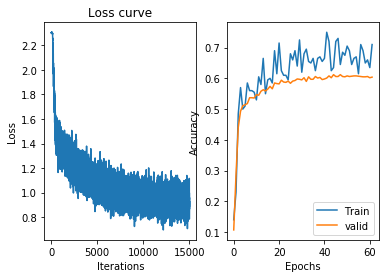

In [11]:
from cs231n.classifiers.neural_net import TwoLayerNet
import time

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

best_val = -1
lrs = [1e-2, 5e-2, 7e-2, 1e-1]
regs = [1e-5] * 4
Hs = [250, 300, 400]
debug = 1
for lr, reg in zip(lrs, regs):
    for h in Hs:
        tic = time.time()
        net = TwoLayerNet(input_dim, h, num_classes)
        stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
                  learning_rate=lr, reg=reg, learning_rate_decay=0.95,
                  batch_size=200, num_iters=15000, verbose=False)
        val_accu = stats['val_acc_history'][-1]
        if val_accu > best_val:
            best_val, best_net = val_accu, net
            best_lr, best_reg, best_h = lr, reg, h
            best_stats = stats
        if debug:
            toc = time.time()
            print("time={:.3f} lr={:.3e} reg={:.3e} #hidden:{:3} loss={:.3f} train accu:={:.3f} \
            val accu={:.3f}".format((toc - tic), lr, reg, h, stats['loss_history'][-1], 
                                    stats['train_acc_history'][-1], stats['val_acc_history'][-1]))

print("Best hyperparams: lr={:.3f} reg={:.3f} #hidden= {:3}".format(
    best_lr, best_reg, best_h))
# plot the loss & accus for the best model
plt.subplot(1, 2, 1)
plt.plot(best_stats['loss_history'])
plt.xlabel('Iterations'); plt.ylabel('Loss')
plt.title('Loss curve')
plt.subplot(1, 2, 2)
plt.plot(best_stats['train_acc_history'], label='Train')
plt.plot(best_stats['val_acc_history'], label='valid')
plt.xlabel('Epochs'); plt.ylabel('Accuracy')
plt.legend()
plt.show()
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


In [12]:
# Run your best neural net classifier on the test set. You should be able
# to get more than 55% accuracy.

test_acc = (best_net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.589
